In [77]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')


In [78]:
df=pd.read_excel(r'train.xlsx')
df.head(5)

,Sold To Party,Material,Order Quantity (EA),Plant,First RDD,Net Value,RDD YYYY-MM
0,1001024881,363083,2000,1100,2020-02-06,474.54,2020-02
1,1001024881,363083,7000,1100,2020-02-06,1310.89,2020-02
2,1001024881,364815,45000,1215,2020-01-09,2317.95,2020-01
3,1001024881,363083,10000,1100,2020-02-05,1872.70,2020-02
4,1001024881,366408,1000,1215,2020-01-09,167.59,2020-01


In [79]:
#check for null values
df.isnull().values.any()

False

In [80]:
df.describe()

,Sold To Party,Material,Order Quantity (EA),Plant,Net Value
count,5.972000e+03,5.972000e+03,5.972000e+03,5972.000000,5972.000000
mean,1.001093e+09,2.162027e+06,1.769599e+04,1086.700603,9894.497525
std,1.896487e+05,7.854677e+06,4.199318e+04,85.407956,21858.762119
min,1.001016e+09,2.202200e+05,1.000000e+00,1014.000000,35.880000
25%,1.001025e+09,2.923350e+05,4.000000e+02,1014.000000,528.650000
50%,1.001025e+09,3.665920e+05,3.000000e+03,1024.000000,2267.450000
75%,1.001027e+09,4.375190e+05,1.625000e+04,1215.000000,10487.120000
max,1.001668e+09,3.649020e+07,1.400000e+06,1215.000000,311062.600000


<AxesSubplot:>

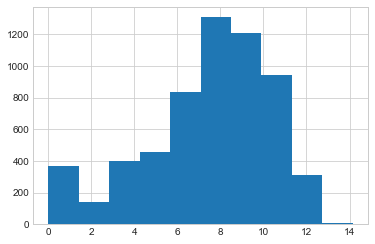

In [83]:
x=df['Order Quantity (EA)']
x=np.log(x)
x.hist()

In [84]:
x.describe()

count    5972.000000
mean        7.479044
std         2.970215
min         0.000000
25%         5.991465
50%         8.006368
75%         9.695848
max        14.151983
Name: Order Quantity (EA), dtype: float64

In [30]:
customers=df['Sold To Party'].unique()
total_customers=len(customers)
print('total no of customers',total_customers)
print(customers)

total no of customers 10
[1001024881 1001024917 1001085300 1001025051 1001667847 1001026584
 1001016461 1001025648 1001016534 1001025300]


In [63]:
months=df['RDD YYYY-MM'].unique()
total_months=len(df['RDD YYYY-MM'].unique())
print('total no of months',total_months)
print(months)

total no of months 20
['2020-02' '2020-01' '2020-03' '2020-04' '2020-05' '2020-06' '2020-07'
 '2020-08' '2020-09' '2020-10' '2021-03' '2021-01' '2021-04' '2021-02'
 '2021-05' '2021-06' '2021-08' '2021-07' '2021-09' '2021-10']


In [67]:
total=len(df['Material'].unique())
print('total no of materials',total)
print(df['Material'].unique())

total no of materials 25
[  363083   364815   366408 36490200   442023   220220   221261   256045
   368653   367861   368774   442970   368652   762165   246003   366592
   437519   366594   554657   559763   560777   292335   560484   551809
   245122]


In [59]:
total_stores=len(df['Plant'].unique())
print('total no of stores',total_stores)

total no of stores 4


In [10]:
for r in range(df.shape[0]):
    if df.loc[r,'First RDD']==0:
         df.loc[r,'RDD YW']=0
    else:
        df.loc[r,'RDD YW']=df.loc[r,'First RDD'].strftime('%Y-%V')

In [11]:
temp=df[(df['Sold To Party']==1001024881) & (df['Material']==363083)]
t1=temp[['RDD YW', 'Order Quantity (EA)']]
t1.sort_values(by='RDD YW', inplace=True)
t1.reset_index(inplace=True, drop=True)
t1=t1.groupby(by='RDD YW').sum()
t1.reset_index(inplace=True)
for r in range(0,t1.shape[0]):
  t1.loc[r,'RDD YW']=datetime.strptime(t1.loc[r,'RDD YW'] + '-1', "%Y-%W-%w")

In [12]:
t1.set_index('RDD YW', inplace=True)

<AxesSubplot:xlabel='RDD YW', ylabel='Order Quantity (EA)'>

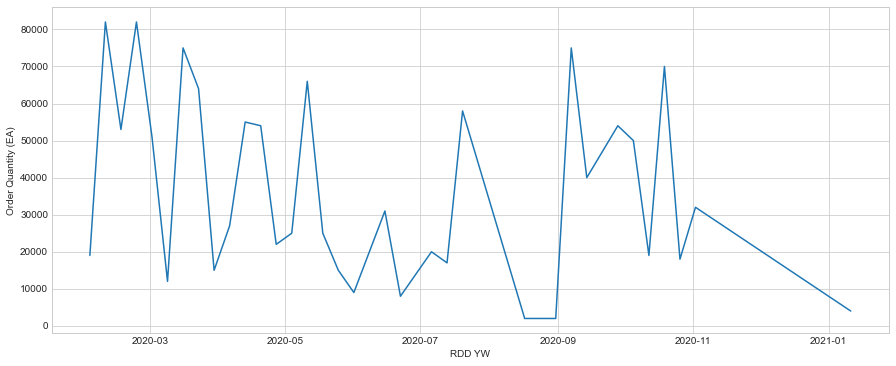

In [13]:
#The weekly orders trend for that customer for that mentioned material
plt.style.use('seaborn-whitegrid')
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='RDD YW', y='Order Quantity (EA)', data=t1)

In [14]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(t1['Order Quantity (EA)'])
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
for value,label in zip(result,labels):
  print(label+' : '+str(value) )
if result[1] <= 0.05:
  print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
else:
  print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic : -1.8479582245162451
p-value : 0.3569248770679728
#Lags Used : 5
Number of Observations Used : 29
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


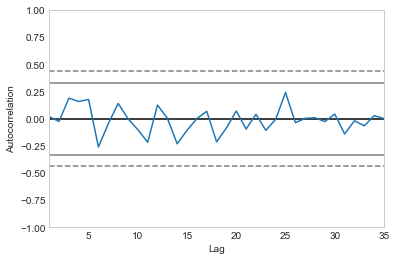

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(t1['Order Quantity (EA)'])
plt.show()

ValueError: could not broadcast input array from shape (35) into shape (41)

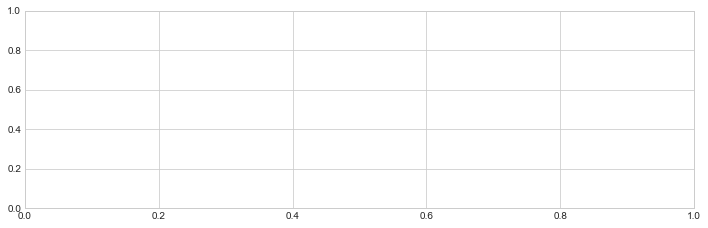

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(t1['Order Quantity (EA)'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(t1['Order Quantity (EA)'],lags=40,ax=ax2)

In [52]:
def sales_dist(data):
    sales_df = data.copy(deep=True)
    sales_df['sales_bins'] = pd.cut(sales_df['Order Quantity (EA)'],[0,1000,10000,25000,50000,100000,1500000])
    print('Max sale:', sales_df['Order Quantity (EA)'].max())
    print('Min sale:', sales_df['Order Quantity (EA)'].min())
    print('Avg sale:', sales_df['Order Quantity (EA)'].mean())
    print()
    return sales_df

sales_df = sales_dist(df)
print(sales_df.head())
# Total number of data points
total_points = pd.value_counts(sales_df.sales_bins).sum()
print('Sales bucket v/s Total percentage:')
display(pd.value_counts(sales_df.sales_bins).apply(lambda s: (s/total_points)*100))   

Max sale: 1400000
Min sale: 1
Avg sale: 17695.987776289352

   Sold To Party  Material  Order Quantity (EA)  Plant  First RDD  Net Value  \
0     1001024881    363083                 2000   1100 2020-02-06     474.54   
1     1001024881    363083                 7000   1100 2020-02-06    1310.89   
2     1001024881    364815                45000   1215 2020-01-09    2317.95   
3     1001024881    363083                10000   1100 2020-02-05    1872.70   
4     1001024881    366408                 1000   1215 2020-01-09     167.59   

  RDD YYYY-MM      sales_bins  
0     2020-02   (1000, 10000]  
1     2020-02   (1000, 10000]  
2     2020-01  (25000, 50000]  
3     2020-02   (1000, 10000]  
4     2020-01       (0, 1000]  
Sales bucket v/s Total percentage:


(0, 1000]            36.604153
(1000, 10000]        33.137977
(10000, 25000]       10.281313
(50000, 100000]       9.427328
(25000, 50000]        7.367716
(100000, 1500000]     3.181514
Name: sales_bins, dtype: float64

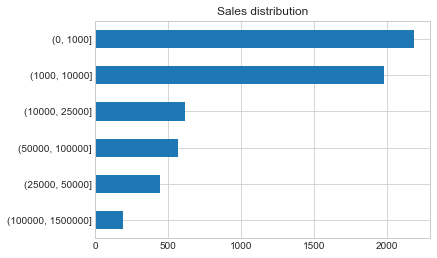

In [51]:
# Let us visualize the same
sales_count = pd.value_counts(sales_df.sales_bins)
sales_count.sort_values(ascending=True).plot(kind='barh', title='Sales distribution', );
# sns.countplot(sales_count)

Order Quantity (EA)                                                 \
Material            220220        221261   245122      246003      256045     
Plant                                                                         
1014                     NaN  19331.257209   4000.0  693.103448  127.669725   
1024                     NaN           NaN      NaN         NaN         NaN   
1100            12611.111111           NaN      NaN         NaN         NaN   
1215             2953.443526           NaN      NaN         NaN         NaN   

                                                                           \
Material 292335        363083        364815        366408        366592     
Plant                                                                       
1014       2590.0           NaN           NaN           NaN           NaN   
1024          NaN  28933.333333  77968.750000   4287.878788  11542.857143   
1100          NaN  24451.162791  85213.483146  10000.000000   8405.405405   
1215          NaN  25807.228916  91514.792899  26157.480315   8714.285714   

          ...                                                         \
Material  ...   437519        442023    442970    551809    554657     
Plant     ...                                                          
1014      ...  47.375887  10464.738292  5.321212  3.772727  3.623482   
1024      ...        NaN           NaN       NaN       NaN       NaN   
1100      ...        NaN           NaN       NaN       NaN       NaN   
1215      ...        NaN           NaN       NaN       NaN       NaN   

                                                                   
Material  559763    560484    560777       762165        36490200  
Plant                                                              
1014      1.191489  1.916667  5.294118          NaN           NaN  
1024           NaN       NaN       NaN          NaN  26178.075000  
1100           NaN       NaN       NaN          NaN   6561.500000  
1215           NaN       NaN       NaN  1682.051282  11754.372414  

[4 rows x 25 columns]

<Figure size 1440x720 with 0 Axes>

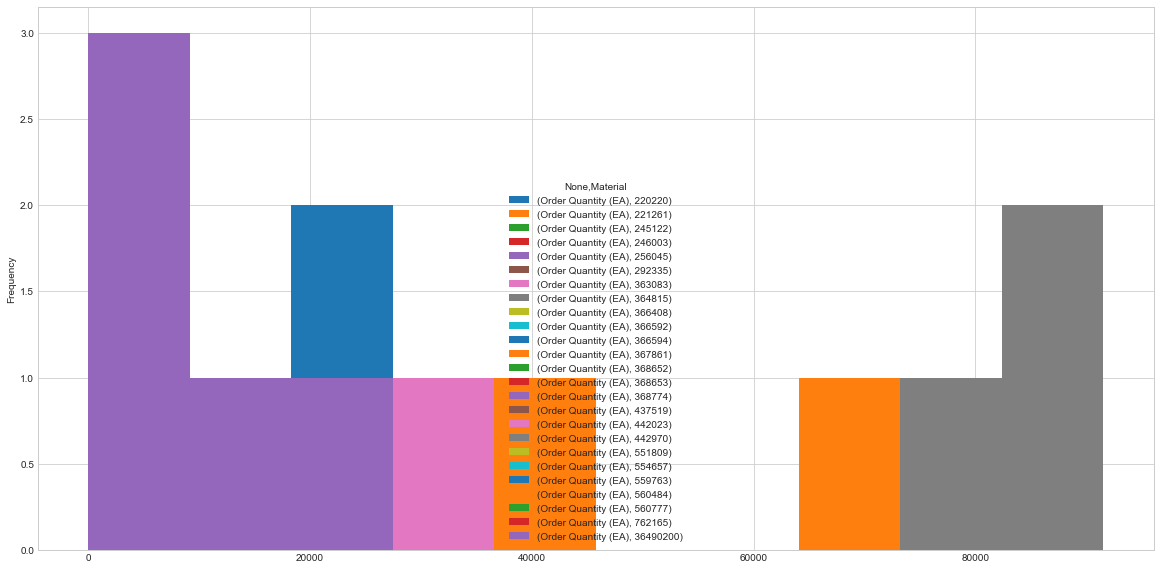

In [56]:
# Let us understand the sales data distribution across the stores
def sales_data_understanding(data):    
    store_df = data.copy()
    plt.figure(figsize=(20,10))
    sales_pivoted_df = pd.pivot_table(store_df, index='Plant', values=['Order Quantity (EA)','RDD YYYY-MM'], columns='Material', aggfunc=np.mean)
    sales_pivoted_df.plot(kind="hist",figsize=(20,10))
    # Pivoted dataframe
    display(sales_pivoted_df)
    return (store_df,sales_pivoted_df)

store_df,sales_pivoted_df = sales_data_understanding(df)

Order Quantity (EA)                                            \
RDD YYYY-MM             2020-01       2020-02       2020-03       2020-04   
Material                                                                    
220220              3941.666667   1642.500000   2083.636364   4930.909091   
221261             45430.434783  43516.666667  44646.296296  18800.000000   
245122                      NaN           NaN           NaN           NaN   
246003               580.000000    508.333333    350.000000    183.333333   
256045               117.200000    104.714286    150.619048    110.230769   
292335              1576.923077   2770.588235   3452.631579   4584.210526   
363083             24840.000000  19302.631579  26431.372549  23911.111111   
364815             67358.974359  98476.190476  64770.833333  79324.324324   
366408              4440.000000   3800.000000   6656.250000   5736.842105   
366592             11600.000000  12074.074074  13743.589744   7363.636364   
366594              6000.000000   2571.428571   2800.000000  16000.000000   
367861             41891.891892  44930.232558  46522.727273  41432.432432   
368652              1266.666667   1133.333333    861.538462  10987.500000   
368653              4800.000000   3916.666667   4116.666667   6813.333333   
368774              2384.615385   2709.677419   3272.727273   3444.444444   
437519                58.666667    184.000000     80.000000     68.108108   
442023             11575.000000  10285.483871  12753.750000  11513.636364   
442970                 7.176471      7.500000      6.933333      5.111111   
551809                      NaN           NaN           NaN      2.000000   
554657                 3.607143      3.689655      3.236842      3.222222   
559763                 1.166667      1.142857      1.000000      1.000000   
560484                      NaN           NaN      3.000000      3.000000   
560777                 2.000000     10.000000      7.500000      1.000000   
762165              1761.538462   1384.000000   1691.304348   2153.333333   
36490200           22041.000000  13135.885714  11432.903226  18546.000000   

                                                                      \
RDD YYYY-MM       2020-05        2020-06       2020-07       2020-08   
Material                                                               
220220        1309.259259    1623.529412   2261.904762   4718.571429   
221261       25573.469388   29991.379310  18370.476190   7091.428571   
245122                NaN            NaN           NaN           NaN   
246003         410.000000     733.333333    428.571429    400.000000   
256045          36.000000            NaN     10.000000      4.000000   
292335        3808.333333    3037.500000   2609.090909   2014.814815   
363083       14103.448276   25375.000000  26000.000000  27555.555556   
364815       88222.222222  127025.641026  66325.000000  86666.666667   
366408        2277.777778    8000.000000  26406.250000  60805.555556   
366592        7882.352941    5307.692308   8205.128205   7085.714286   
366594       16421.052632   24105.263158  29733.333333  38600.000000   
367861       45833.333333   42606.060606  41822.222222  48826.086957   
368652        2100.000000    2983.333333  11333.333333   3340.000000   
368653        4915.789474    2412.500000   2788.888889   3786.666667   
368774        2789.473684    3523.809524   4600.000000   3230.769231   
437519          44.000000      43.471698     37.600000     39.272727   
442023        8828.125000    9339.705882   8942.307692   9585.000000   
442970           6.714286       7.823529      3.578947      3.375000   
551809           1.500000       5.000000      3.666667      3.000000   
554657           4.250000       3.750000      4.500000      2.942857   
559763           1.750000       2.500000      1.000000      1.000000   
560484           1.000000       2.000000           NaN      1.000000   
560777           4.000000      10.000000           NaN 

<Figure size 1440x720 with 0 Axes>

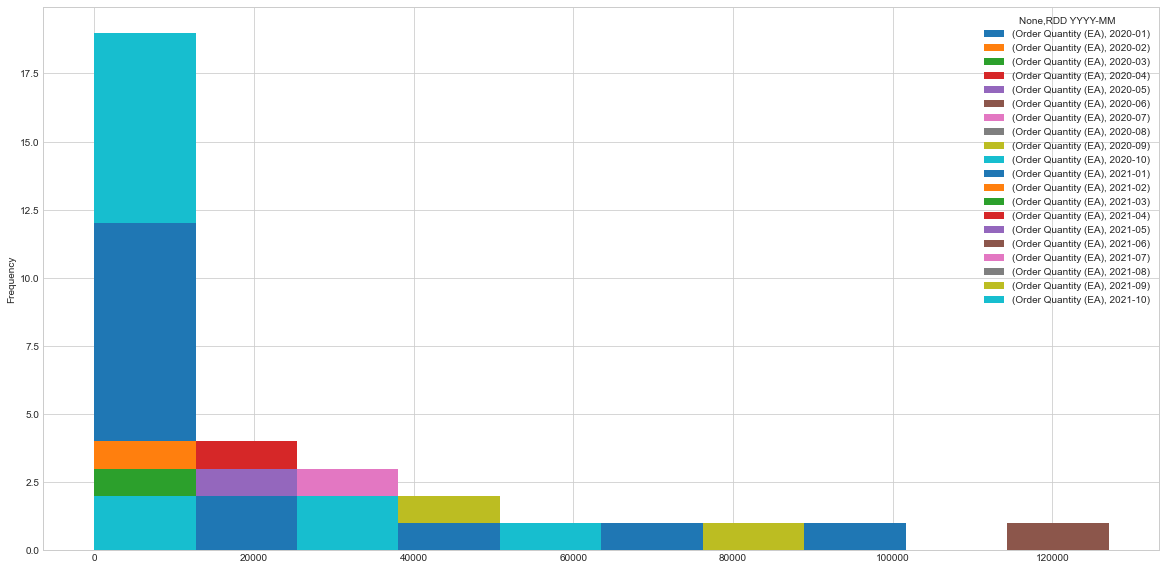

In [65]:
# Let us understand the sales data distribution for each material
def sales_data_understanding(data): 
    store_df = data.copy()
    plt.figure(figsize=(20,10))
    sales_pivoted_df = pd.pivot_table(store_df, index='Material', values=['Order Quantity (EA)'], columns='RDD YYYY-MM', aggfunc=np.mean)
    sales_pivoted_df.plot(kind="hist",figsize=(20,10))
    # Pivoted dataframe
    display(sales_pivoted_df)
    return (store_df,sales_pivoted_df)

store_df,sales_pivoted_df = sales_data_understanding(df)

In [64]:
sales_pivoted_df

Order Quantity (EA)                                            \
RDD YYYY-MM             2020-01       2020-02       2020-03       2020-04   
Material                                                                    
220220              3941.666667   1642.500000   2083.636364   4930.909091   
221261             45430.434783  43516.666667  44646.296296  18800.000000   
245122                      NaN           NaN           NaN           NaN   
246003               580.000000    508.333333    350.000000    183.333333   
256045               117.200000    104.714286    150.619048    110.230769   
292335              1576.923077   2770.588235   3452.631579   4584.210526   
363083             24840.000000  19302.631579  26431.372549  23911.111111   
364815             67358.974359  98476.190476  64770.833333  79324.324324   
366408              4440.000000   3800.000000   6656.250000   5736.842105   
366592             11600.000000  12074.074074  13743.589744   7363.636364   
366594              6000.000000   2571.428571   2800.000000  16000.000000   
367861             41891.891892  44930.232558  46522.727273  41432.432432   
368652              1266.666667   1133.333333    861.538462  10987.500000   
368653              4800.000000   3916.666667   4116.666667   6813.333333   
368774              2384.615385   2709.677419   3272.727273   3444.444444   
437519                58.666667    184.000000     80.000000     68.108108   
442023             11575.000000  10285.483871  12753.750000  11513.636364   
442970                 7.176471      7.500000      6.933333      5.111111   
551809                      NaN           NaN           NaN      2.000000   
554657                 3.607143      3.689655      3.236842      3.222222   
559763                 1.166667      1.142857      1.000000      1.000000   
560484                      NaN           NaN      3.000000      3.000000   
560777                 2.000000     10.000000      7.500000      1.000000   
762165              1761.538462   1384.000000   1691.304348   2153.333333   
36490200           22041.000000  13135.885714  11432.903226  18546.000000   

                                                                      \
RDD YYYY-MM       2020-05        2020-06       2020-07       2020-08   
Material                                                               
220220        1309.259259    1623.529412   2261.904762   4718.571429   
221261       25573.469388   29991.379310  18370.476190   7091.428571   
245122                NaN            NaN           NaN           NaN   
246003         410.000000     733.333333    428.571429    400.000000   
256045          36.000000            NaN     10.000000      4.000000   
292335        3808.333333    3037.500000   2609.090909   2014.814815   
363083       14103.448276   25375.000000  26000.000000  27555.555556   
364815       88222.222222  127025.641026  66325.000000  86666.666667   
366408        2277.777778    8000.000000  26406.250000  60805.555556   
366592        7882.352941    5307.692308   8205.128205   7085.714286   
366594       16421.052632   24105.263158  29733.333333  38600.000000   
367861       45833.333333   42606.060606  41822.222222  48826.086957   
368652        2100.000000    2983.333333  11333.333333   3340.000000   
368653        4915.789474    2412.500000   2788.888889   3786.666667   
368774        2789.473684    3523.809524   4600.000000   3230.769231   
437519          44.000000      43.471698     37.600000     39.272727   
442023        8828.125000    9339.705882   8942.307692   9585.000000   
442970           6.714286       7.823529      3.578947      3.375000   
551809           1.500000       5.000000      3.666667      3.000000   
554657           4.250000       3.750000      4.500000      2.942857   
559763           1.750000       2.500000      1.000000      1.000000   
560484           1.000000       2.000000           NaN      1.000000   
560777           4.000000      10.000000           NaN 

In [66]:
def sales_insight(sales_pivoted_df):
    # Let us calculate the average sales of each of the item across all the stores
    sales_across_item_df = sales_pivoted_df.copy()
    # Aggregate the sales per item and add it as a new row in the same dataframe
    sales_across_item_df.loc[11] = sales_across_item_df.apply(lambda r: r.mean(), axis=0)
    # Note the 11th index row, which is the average sale of each of the item across all the stores
    #display(sales_across_item_df.loc[11:])
    avg_sales_per_item_across_stores_df = pd.DataFrame(data=[[i+1,a] for i,a in enumerate(sales_across_item_df.loc[11:].values[0])], columns=['item', 'avg_sale'])
    # And finally, sort by avg sale
    avg_sales_per_item_across_stores_df.sort_values(by='avg_sale', ascending=False, inplace=True)
    # Display the top 10 rows
    display(avg_sales_per_item_across_stores_df.head())
    return (sales_across_item_df,avg_sales_per_item_across_stores_df)

sales_across_item_df,avg_sales_per_item_across_stores_df = sales_insight(sales_pivoted_df)

,item,avg_sale
10,11,17823.198831
7,8,13207.562920
5,6,12904.233480
6,7,12061.220295
1,2,11930.397241


In [76]:
import plotly.graph_objs as go
import plotly.offline as py
def Time_visualization(data):
    store_item_df = data.copy()
    # First, let us filterout the required data
    store_id = 10   # Some store
    item_id = 363083    # Some item
    print('Before filter:', store_item_df.shape)
    #store_item_df = store_item_df[store_item_df.store == store_id]
    store_item_df = store_item_df[store_item_df.Material == item_id]
    print('After filter:', store_item_df.shape)
    #display(store_item_df.head())

    # Let us plot this now
    store_item_ts_data = [go.Bar(
        x=store_item_df['RDD YYYY-MM'],
        y=store_item_df['Order Quantity (EA)'])]
    py.iplot(store_item_ts_data)
    return store_item_df

store_item_df = Time_visualization(df)

Before filter: (5972, 7)
After filter: (456, 7)
